In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade scipy networkx

  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.7.1
    Uninstalling networkx-2.7.1:
      Successfully uninstalled networkx-2.7.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

In [4]:
pip install -q contractions==0.0.48

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np  
import pandas as pd 
import re  
import lxml  
import nltk
from bs4 import BeautifulSoup 
from contractions import contractions_dict
from nltk.corpus import stopwords   

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("../raw_data/train.csv", nrows = 1000)

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,"By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundr...","Bishop John Folda, of North Dakota, is taking time off after being diagnosed .\nHe contracted the infection through contaminated food in Italy .\nChurch members in Fargo, Grand Forks and Jamestown..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,"(CNN) -- Ralph Mata was an internal affairs lieutenant for the Miami-Dade Police Department, working in the division that investigates allegations of wrongdoing by cops. Outside the office, author...","Criminal complaint: Cop used his role to help cocaine traffickers .\nRalph Mata, an internal affairs lieutenant, allegedly helped group get guns .\nHe also arranged to pay two assassins in a murde..."
2,00027e965c8264c35cc1bc55556db388da82b07f,"A drunk driver who killed a young woman in a head-on crash while checking his mobile phone has been jailed for six years. Craig Eccleston-Todd, 27, was driving home from a night at a pub when he r...","Craig Eccleston-Todd, 27, had drunk at least three pints before driving car .\nWas using phone when he veered across road in Yarmouth, Isle of Wight .\nCrashed head-on into 28-year-old Rachel Titl..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,"(CNN) -- With a breezy sweep of his pen President Vladimir Putin wrote a new chapter into Crimea's turbulent history, committing the region to a future returned to Russian domain. Sixty years prio...","Nina dos Santos says Europe must be ready to accept sanctions will hurt both sides .\nTargeting Russia's business community would be one way of sapping their support for President Putin, she says ..."
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 100% record in Sky Bet League One as a 2-0 win over Scunthorpe sent Graham Alexander’s men top of the table. The Cod Army are playing in the third tier ...,"Fleetwood top of League One after 2-0 win at Scunthorpe .\nPeterborough, Bristol City, Chesterfield and Crawley all drop first points of the season .\nStand-in striker Matt Done scores a hat-trick..."
...,...,...,...
995,02cda7baa5ffb66030294542e7372ed3d5742b22,"After the anxiety of the first day Andy Murray settled comfortably into the US Open with a cramp-free, drama-free passage into the third round. Under the glare the Arthur Ashe Stadium lights and i...","Andy Murray wins 6-3, 6-3, 6-4 in one hour and 46 minutes against German qualifier Matthias Bachinger at Flushing Meadows .\nThere were no signs of any physical problems with Murray on Arthur Ashe..."
996,02ce5810b37842c00ae90b6c7b70dbf686cd865f,"By . Leon Watson and Sebastian Lander . PUBLISHED: . 23:55 EST, 10 October 2012 . | . UPDATED: . 11:06 EST, 11 October 2012 . Package holidays are making a comeback with more families seeking valu...","Figures released by ABTA show Britons took fewer holidays in 2012 .\nThere has been a decrease in the number of people on DIY holidays .\nDomestic holiday packages, such as coach tours, were also ..."
997,02cebc35c007eb63dc0a22f96de0541e4269793e,"Mexico's government is trying to block the execution of a convicted cop killer in Texas this week, arguing that it would violate international law. The case of Mexican citizen Edgar Tamayo Arias i...",Defense attorneys are expected to present oral arguments Tuesday .\nEdgar Tamayo Arias is scheduled to be executed in Texas on Wednesday .\nMexico's government says the execution would violate int...
998,02d123388fbdf6da1466253313fe6641595c291c,By . Rob Cooper . Last updated at 5:05 PM on 24th January 2012 . It must be every car fans dream but they might not get much sleep with the engine noise in this superpowered 600bhp bunkbed. The un...,"High-speed bed is fitted with a V8 600bhp engine and could sell for £15k .\nSnake Pit car with SIX synchronised Ford Cobra V8 engines cap

In [4]:
data.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,"By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundr...","Bishop John Folda, of North Dakota, is taking time off after being diagnosed .\nHe contracted the infection through contaminated food in Italy .\nChurch members in Fargo, Grand Forks and Jamestown..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,"(CNN) -- Ralph Mata was an internal affairs lieutenant for the Miami-Dade Police Department, working in the division that investigates allegations of wrongdoing by cops. Outside the office, author...","Criminal complaint: Cop used his role to help cocaine traffickers .\nRalph Mata, an internal affairs lieutenant, allegedly helped group get guns .\nHe also arranged to pay two assassins in a murde..."
2,00027e965c8264c35cc1bc55556db388da82b07f,"A drunk driver who killed a young woman in a head-on crash while checking his mobile phone has been jailed for six years. Craig Eccleston-Todd, 27, was driving home from a night at a pub when he r...","Craig Eccleston-Todd, 27, had drunk at least three pints before driving car .\nWas using phone when he veered across road in Yarmouth, Isle of Wight .\nCrashed head-on into 28-year-old Rachel Titl..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,"(CNN) -- With a breezy sweep of his pen President Vladimir Putin wrote a new chapter into Crimea's turbulent history, committing the region to a future returned to Russian domain. Sixty years prio...","Nina dos Santos says Europe must be ready to accept sanctions will hurt both sides .\nTargeting Russia's business community would be one way of sapping their support for President Putin, she says ..."
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 100% record in Sky Bet League One as a 2-0 win over Scunthorpe sent Graham Alexander’s men top of the table. The Cod Army are playing in the third tier ...,"Fleetwood top of League One after 2-0 win at Scunthorpe .\nPeterborough, Bristol City, Chesterfield and Crawley all drop first points of the season .\nStand-in striker Matt Done scores a hat-trick..."


In [5]:
len(data)

1000

In [6]:
data.drop_duplicates(subset=['article'],inplace=True)  #dropping duplicates
len(data)

1000

In [7]:
data.dropna(axis=0,inplace = True)
len(data)

1000

In [8]:
for key, value in list(contractions_dict.items())[:10]: 
    print(f'{key} == {value}')

I'm == I am
I'm'a == I am about to
I'm'o == I am going to
I've == I have
I'll == I will
I'll've == I will have
I'd == I would
I'd've == I would have
Whatcha == What are you
amn't == am not


In [9]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/mayank-
[nltk_data]     soni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [16]:
import lxml
from bs4 import BeautifulSoup

In [17]:
#Note: I did not lemmatize the words as we are not interested to group words into their root form  

def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text     #remove HTML tags"
    newString = re.sub(r'\([^)]*\)', '', newString)       #remove punctuation  
    newString = re.sub('"','', newString)                 #remove punctuation  
    
    #convert to long form 
    newString = ' '.join([contractions_dict[t] if t in contractions_dict else t for t in newString.split(" ")])    
    
    newString = re.sub(r"'s\b","",newString)              #remove 's 
    newString = re.sub("[^a-zA-Z]", " ", newString)       #remove special characters 
    
    tokens = [w for w in newString.split() if not w in stop_words]      #only tokenize non-stop words 
    
    long_words=[]
    for i in tokens:
        if len(i)>=3:                                     #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in data['article']:
    cleaned_text.append(text_cleaner(t))
 
cleaned_text

FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?

In [17]:
data['cleaned_text']=cleaned_text
data.dropna(axis=0,inplace=True)

len(data)

11488

In [18]:
for i in range(5):
    print("article:",data['cleaned_text'][i])
    print("\n")

article: ever noticed plane seats appear getting smaller smaller increasing numbers people taking skies experts questioning packed planes putting passengers risk say shrinking space aeroplanes uncomfortable putting health safety danger squabbling arm rest shrinking space planes putting health safety danger week consumer advisory group set department transportation said public hearing government happy set standards animals flying planes stipulate minimum amount space humans world animals rights space food humans said charlie leocha consumer representative committee time dot faa take stand humane treatment passengers could crowding planes lead serious issues fighting space overhead lockers crashing elbows seat back kicking tests conducted faa use planes inch pitch standard airlines decreased many economy seats united airlines inches room airlines offer little inches cynthia corbertt human factors researcher federal aviation administration conducts tests quickly passengers leave plane tes

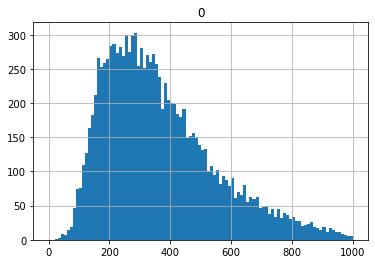

In [21]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

length_df = pd.DataFrame(text_word_count)
length_df.hist(bins = 100,range=[0, 1000])
plt.show()

In [22]:
max_len_text=800 

In [23]:
#vectorize data and pad zeros to max length  

X = data['cleaned_text']


X_tokenizer = Tokenizer()
X_tokenizer.fit_on_texts(list(X))
X_vector =  X_tokenizer.texts_to_sequences(X)  
X_vector = pad_sequences(X_vector, maxlen=max_len_text, padding='post') 

In [24]:
print(X_vector.shape)

(11488, 800)


In [25]:
X_vector[0]

array([  225,  2104,   721,  1600,   756,   303,  2366,  2366,  2262,
        1567,     9,   187,  6059,   854,  4616,  2783,  3010,  1120,
         924,   568,    62, 11903,   559, 34572,  4665,  1120,   251,
         634,  1964, 42602,  1686,   715, 11903,   559,  3010,  1120,
         251,   634,  1964,    48,  4637, 12347,   128,    99,   370,
        5208,     1,   163,   697,   157,   403,    99,  2298,   947,
        1323,  3010, 49223,  3155,   920,   559,  1992,    25,   947,
         655,   559,   293,  1992,     1,  1691, 61049,  4637,  3470,
        2213,     8, 11904, 12348,    45,   563, 13058,   493,   924,
          13, 22743,  3010,   297,   643,   934,   895,   559,  7512,
       18233,  4771, 17199,  1198,    17,  4276,  1335,  2729, 12348,
         149,  3010,  3755,  1013,  1946,  2473, 15490,    44,  1590,
        1600,    59,  2473,  3511,   315,  2473,   765,   141,  3511,
        7582, 61050,   479,  3813,  5209,   839,  4043,  1951, 17200,
        1335,   731,

In [26]:
X_voc_size  =   len(X_tokenizer.word_index) +1 
print (f'There are {X_voc_size} different words in the main text')

There are 86527 different words in the main text


TextRank is an extractive and unsupervised text summarization technique
1 - Concatenate all the text contained in the articles
2 - Split the text into individual sentences
3 - Find vector representation (word embeddings) for each and every sentence
4 - Similarities between sentence vectors are then calculated and stored in a matrix
5 - The similarity matrix is then converted into a graph, with sentences as vertices and similarity scores as edges, for sentence rank calculation
6 - A certain number of top-ranked sentences form the final summary

Note:  Train, test, split may not be meaningful for unsupervised algo 

In [27]:
#reduced the amount of data in order to run the programme 
X_vector_reduced = X_vector[:200]
len(X_vector_reduced)

200

In [ ]:
word_frequencies = {}
for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1